In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [ ]:
ad_data = pd.read_csv('tested.csv')

In [5]:
ad_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


(array([42., 42., 42., 41., 42., 42., 41., 42., 42., 42.]),
 array([ 892. ,  933.7,  975.4, 1017.1, 1058.8, 1100.5, 1142.2, 1183.9,
        1225.6, 1267.3, 1309. ]),
 <BarContainer object of 10 artists>)

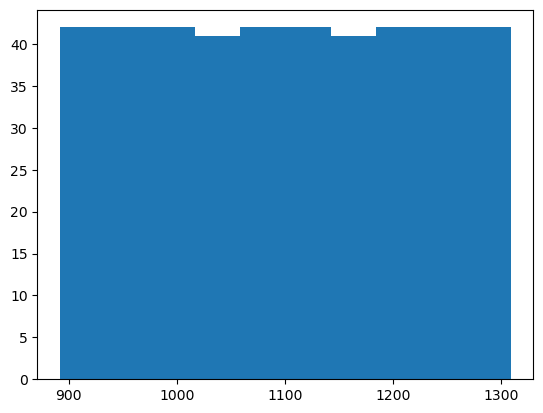

In [13]:
plt.hist(ad_data['PassengerId'])

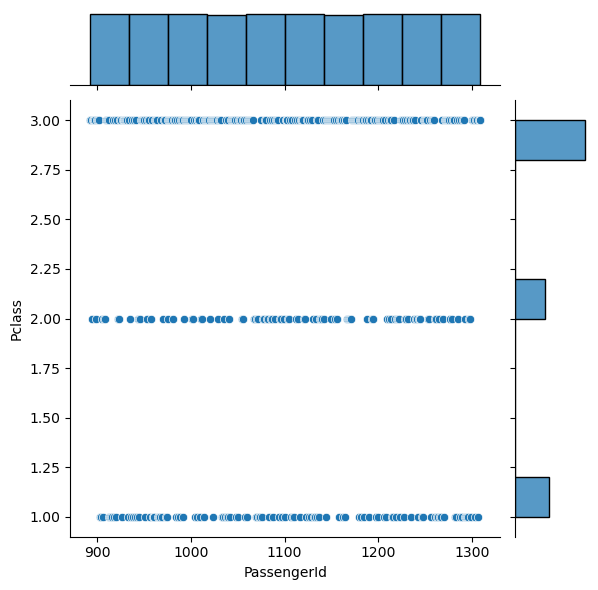

In [20]:
sns.jointplot(x='PassengerId',y='Pclass',data=ad_data)

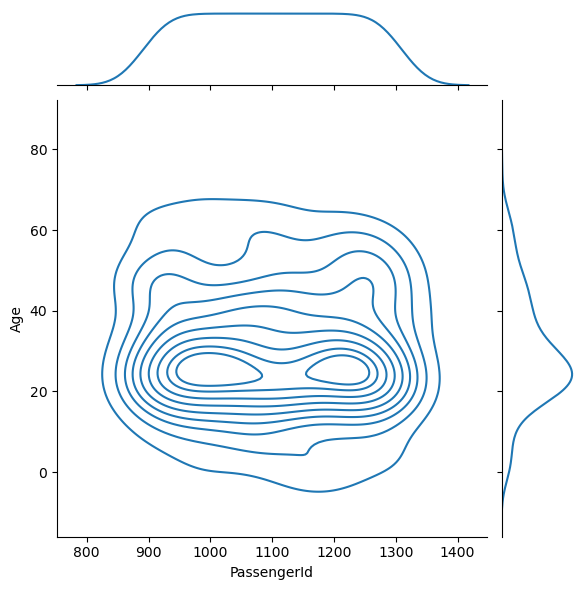

In [22]:
sns.jointplot(x='PassengerId',y='Age',data=ad_data,kind='kde')

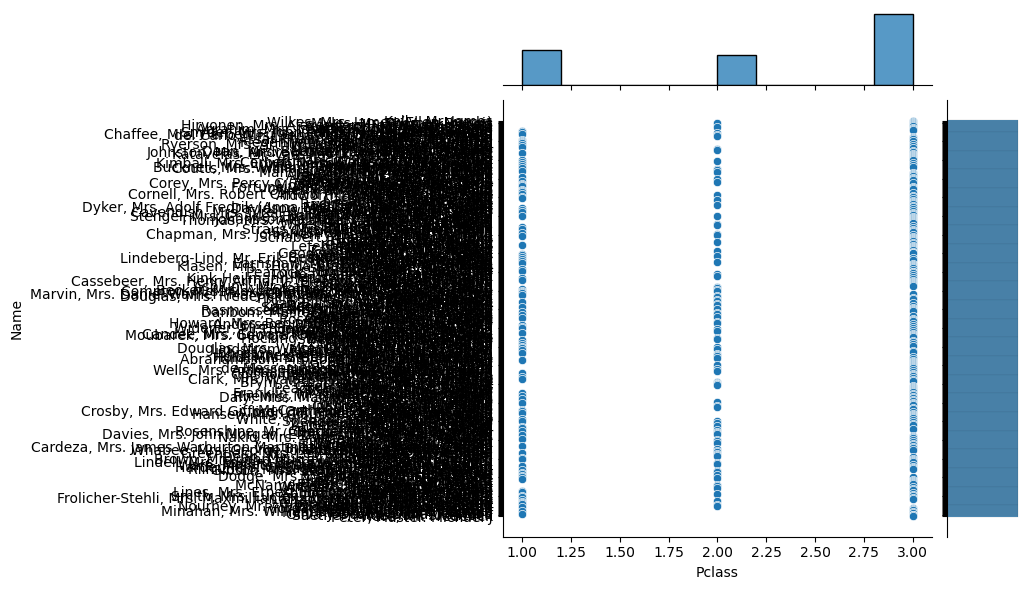

In [23]:
sns.jointplot(x='Pclass',y='Name',data=ad_data,)

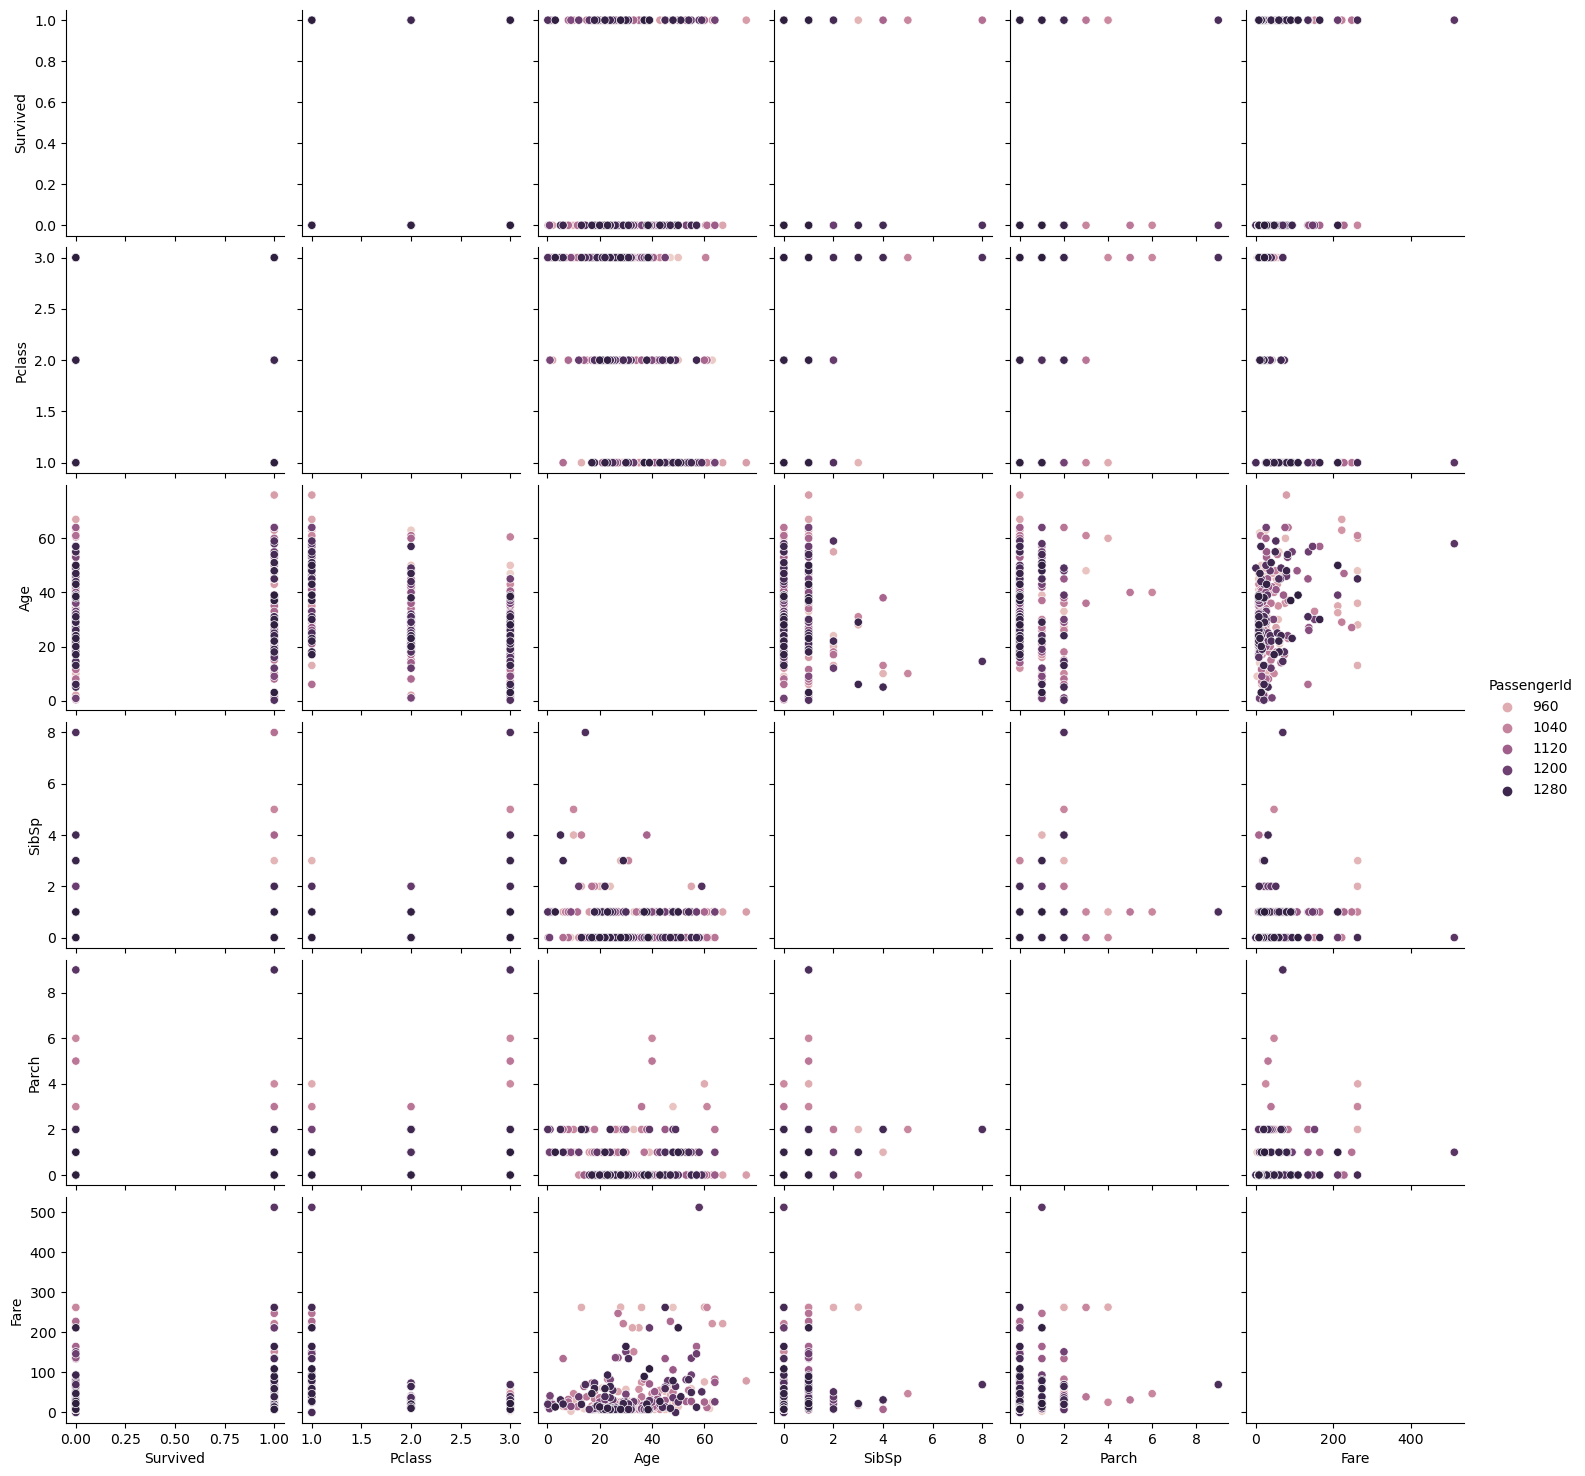

In [24]:
sns.pairplot(data=ad_data,hue='PassengerId')

In [54]:
from sklearn.model_selection import train_test_split
X = ad_data[['SibSp', 'PassengerId', 'Age', 'Pclass','Fare']]
ad_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
y = ad_data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [7]:
from sklearn.model_selection import train_test_split

# Assuming ad_data is a valid pandas DataFrame
X = ad_data[['SibSp', 'PassengerId', 'Age', 'Pclass', 'Fare']]  # Feature selection
y = ad_data['Survived']  # Target variable

# Splitting data into training and testing sets (40% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data

In [10]:
print(ad_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
ad_data = ad_data.dropna()

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', etc.
X[['Age', 'Fare']] = imputer.fit_transform(X[['Age', 'Fare']])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X[['Age', 'Fare']] = imputer.fit_transform(X[['Age', 'Fare']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_scaled)


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.66      0.96      0.79       107
           1       0.69      0.15      0.24        61

    accuracy                           0.67       168
   macro avg       0.68      0.56      0.51       168
weighted avg       0.67      0.67      0.59       168

[[103   4]
 [ 52   9]]


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid.best_params_}")
best_model = grid.best_estimator_

Best Parameters: {'C': 0.01}
